<a href="https://colab.research.google.com/github/samuelvarkey/Data-Science/blob/master/Platform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2,style='darkgrid')

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#change display into using full screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [0]:
#import .csv file
data = pd.read_csv('/content/drive/My Drive/Digital Marketing data/4. FB_data_platform.csv')

In [0]:
data.head()

,Campaign name,Ad set name,Ad name,Platform,Result Type,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all),Reporting starts,Reporting ends
0,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,Image-Minimum Investment & Maximum Profit,facebook,On-Facebook leads,66.0,2.048234,0.203283,3581.630000,54.267121,2.771168,110.316013,32467,665,2019-11-01,2019-12-03
1,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Partner with us today!,facebook,On-Facebook leads,38.0,1.614188,0.131629,2243.260000,59.033158,3.159917,77.704804,28869,466,2019-11-01,2019-12-03
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,Image-Minimum Investment & Maximum Profit,facebook,On-Facebook leads,39.0,2.082948,0.180122,2564.862106,65.765695,2.252601,118.458438,21652,451,2019-11-01,2019-12-03
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,Video-No. 1 Franchise Opportunity,facebook,On-Facebook leads,27.0,2.073127,0.139240,2321.700000,85.988889,2.522899,119.730803,19391,402,2019-11-01,2019-12-03
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,facebook,On-Facebook leads,50.0,3.079187,0.262729,2037.960000,40.759200,2.754922,107.086333,19031,586,2019-11-01,2019-12-03


In [0]:
#Consider only those records where amount spent > 0
data = data[(data['Amount spent (INR)'] > 0)]

In [0]:
data.shape

(62, 16)

In [0]:
#We see that Reporting Starts and Reporting Ends are additional columns which we don't require. So we drop them
data.drop(['Reporting ends','Reporting starts'],axis=1, inplace = True)

In [0]:
#look at the data again
data.head()

,Campaign name,Ad set name,Ad name,Platform,Result Type,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all)
0,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,Image-Minimum Investment & Maximum Profit,facebook,On-Facebook leads,66.0,2.048234,0.203283,3581.630000,54.267121,2.771168,110.316013,32467,665
1,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Partner with us today!,facebook,On-Facebook leads,38.0,1.614188,0.131629,2243.260000,59.033158,3.159917,77.704804,28869,466
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,Image-Minimum Investment & Maximum Profit,facebook,On-Facebook leads,39.0,2.082948,0.180122,2564.862106,65.765695,2.252601,118.458438,21652,451
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,Video-No. 1 Franchise Opportunity,facebook,On-Facebook leads,27.0,2.073127,0.139240,2321.700000,85.988889,2.522899,119.730803,19391,402
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,facebook,On-Facebook leads,50.0,3.079187,0.262729,2037.960000,40.759200,2.754922,107.086333,19031,586


In [0]:
#check rows and columns in data
data.shape

(62, 14)

In [0]:
#let's look if any column has null values
data.isnull().sum()

Campaign name                        0
Ad set name                          0
Ad name                              0
Platform                             0
Result Type                         16
Results                             16
CTR (all)                            0
Result rate                         16
Amount spent (INR)                   0
Cost per result                     16
Frequency                            0
CPM (cost per 1,000 impressions)     0
Impressions                          0
Clicks (all)                         0
dtype: int64

#### Voila! Results & Result rate column has no nulls now. Let's see what column Results Type is all about. 

In [0]:
data['Result Type'].value_counts()

On-Facebook leads    46
Name: Result Type, dtype: int64

So we infer that 'Result Type' is basically the type of conversion event taking place. It can be either Page Like, Post Like, On-Facebook Lead, Custom Conversion etc. **Since, we are analysing just one campaign here, we can drop this column as it has same meaning throughout data set.**

If we were analysing multiple campaigns, with different objectives, then keeping this column would have made sense.

In [0]:
#Drop Result Type column from data
data.drop(['Result Type'],axis=1, inplace = True)

In [0]:
#check how many nulls are still there 
data.isnull().sum()

Campaign name                        0
Ad set name                          0
Ad name                              0
Platform                             0
Results                              0
CTR (all)                            0
Result rate                          0
Amount spent (INR)                   0
Cost per result                     16
Frequency                            0
CPM (cost per 1,000 impressions)     0
Impressions                          0
Clicks (all)                         0
dtype: int64

Now we need to deal with **Cost per result**.
The cases where CPA is Null means that there was no conversion. So ideally, in these cases the CPA should be very high (in case a conversion actually happened).

#### So, let's leave this column as it is because we can't assign any value for records where no conversion happened.

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Campaign name                     62 non-null     object 
 1   Ad set name                       62 non-null     object 
 2   Ad name                           62 non-null     object 
 3   Platform                          62 non-null     object 
 4   Results                           62 non-null     float64
 5   CTR (all)                         62 non-null     float64
 6   Result rate                       62 non-null     float64
 7   Amount spent (INR)                62 non-null     float64
 8   Cost per result                   46 non-null     float64
 9   Frequency                         62 non-null     float64
 10  CPM (cost per 1,000 impressions)  62 non-null     float64
 11  Impressions                       62 non-null     int64  
 12  Clicks (al

### 1. We can divide Frequency in buckets

In [0]:
data['Frequency'] = data['Frequency'].apply(lambda x:'1 to 2' if x<2
                                               else '2 to 3' if x>=2 and x<3 
                                               else '3 to 4' if x>=3 and x<4
                                               else '4 to 5' if x>=4 and x<5
                                               else 'More than 5')

In [0]:
data.head()

,Campaign name,Ad set name,Ad name,Platform,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all)
0,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,Image-Minimum Investment & Maximum Profit,facebook,66.0,2.048234,0.203283,3581.630000,54.267121,2 to 3,110.316013,32467,665
1,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Partner with us today!,facebook,38.0,1.614188,0.131629,2243.260000,59.033158,3 to 4,77.704804,28869,466
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,Image-Minimum Investment & Maximum Profit,facebook,39.0,2.082948,0.180122,2564.862106,65.765695,2 to 3,118.458438,21652,451
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,Video-No. 1 Franchise Opportunity,facebook,27.0,2.073127,0.139240,2321.700000,85.988889,2 to 3,119.730803,19391,402
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,facebook,50.0,3.079187,0.262729,2037.960000,40.759200,2 to 3,107.086333,19031,586


### 2. Split Ad name into Ad Format and Ad Headline

In [0]:
data['Ad_name'] = data['Ad name']

In [0]:
data.head()

,Campaign name,Ad set name,Ad name,Platform,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all),Ad_name
0,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,Image-Minimum Investment & Maximum Profit,facebook,66.0,2.048234,0.203283,3581.630000,54.267121,2 to 3,110.316013,32467,665,Image-Minimum Investment & Maximum Profit
1,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Partner with us today!,facebook,38.0,1.614188,0.131629,2243.260000,59.033158,3 to 4,77.704804,28869,466,Image-Partner with us today!
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,Image-Minimum Investment & Maximum Profit,facebook,39.0,2.082948,0.180122,2564.862106,65.765695,2 to 3,118.458438,21652,451,Image-Minimum Investment & Maximum Profit
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,Video-No. 1 Franchise Opportunity,facebook,27.0,2.073127,0.139240,2321.700000,85.988889,2 to 3,119.730803,19391,402,Video-No. 1 Franchise Opportunity
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,facebook,50.0,3.079187,0.262729,2037.960000,40.759200,2 to 3,107.086333,19031,586,Image-Minimum Investment & Maximum Profit


In [0]:
data[['Ad Format','Ad Headline']] = data.Ad_name.str.split("-",expand=True)

In [0]:
data.head()

,Campaign name,Ad set name,Ad name,Platform,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all),Ad_name,Ad Format,Ad Headline
0,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,Image-Minimum Investment & Maximum Profit,facebook,66.0,2.048234,0.203283,3581.630000,54.267121,2 to 3,110.316013,32467,665,Image-Minimum Investment & Maximum Profit,Image,Minimum Investment & Maximum Profit
1,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Partner with us today!,facebook,38.0,1.614188,0.131629,2243.260000,59.033158,3 to 4,77.704804,28869,466,Image-Partner with us today!,Image,Partner with us today!
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,Image-Minimum Investment & Maximum Profit,facebook,39.0,2.082948,0.180122,2564.862106,65.765695,2 to 3,118.458438,21652,451,Image-Minimum Investment & Maximum Profit,Image,Minimum Investment & Maximum Profit
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,Video-No. 1 Franchise Opportunity,facebook,27.0,2.073127,0.139240,2321.700000,85.988889,2 to 3,119.730803,19391,402,Video-No. 1 Franchise Opportunity,Video,No. 1 Franchise Opportunity
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,facebook,50.0,3.079187,0.262729,2037.960000,40.759200,2 to 3,107.086333,19031,586,Image-Minimum Investment & Maximum Profit,Image,Minimum Investment & Maximum Profit


In [0]:
data.drop(['Ad name','Ad_name'],axis=1, inplace = True)

In [0]:
data.head()

,Campaign name,Ad set name,Platform,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all),Ad Format,Ad Headline
0,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,facebook,66.0,2.048234,0.203283,3581.630000,54.267121,2 to 3,110.316013,32467,665,Image,Minimum Investment & Maximum Profit
1,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,facebook,38.0,1.614188,0.131629,2243.260000,59.033158,3 to 4,77.704804,28869,466,Image,Partner with us today!
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,facebook,39.0,2.082948,0.180122,2564.862106,65.765695,2 to 3,118.458438,21652,451,Image,Minimum Investment & Maximum Profit
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,facebook,27.0,2.073127,0.139240,2321.700000,85.988889,2 to 3,119.730803,19391,402,Video,No. 1 Franchise Opportunity
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,facebook,50.0,3.079187,0.262729,2037.960000,40.759200,2 to 3,107.086333,19031,586,Image,Minimum Investment & Maximum Profit


In [0]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Campaign name                     62 non-null     object 
 1   Ad set name                       62 non-null     object 
 2   Platform                          62 non-null     object 
 3   Results                           62 non-null     float64
 4   CTR (all)                         62 non-null     float64
 5   Result rate                       62 non-null     float64
 6   Amount spent (INR)                62 non-null     float64
 7   Cost per result                   46 non-null     float64
 8   Frequency                         62 non-null     object 
 9   CPM (cost per 1,000 impressions)  62 non-null     float64
 10  Impressions                       62 non-null     int64  
 11  Clicks (all)                      62 non-null     int64  
 12  Ad Format 

In [0]:
data.to_csv('4. Clean_Data_Platform.csv')

### 1. Effect of Platform + Ad Format

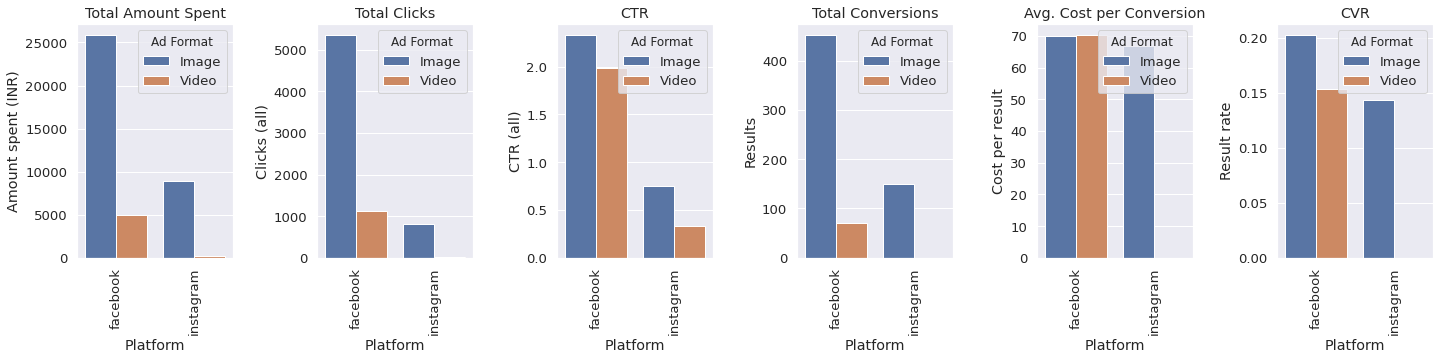

In [0]:
# increase figure size 
plt.figure(figsize=(20, 5))

# subplot 1
plt.subplot(1, 6, 1)
sns.barplot(x='Platform', y='Amount spent (INR)', data=data, hue='Ad Format', estimator=np.sum,ci=None)
plt.title("Total Amount Spent")
plt.xticks(rotation=90)


# subplot 2
plt.subplot(1, 6, 2)
sns.barplot(x='Platform', y='Clicks (all)', data=data, hue='Ad Format', estimator=np.sum,ci=None)
plt.title("Total Clicks")
plt.xticks(rotation=90)

# subplot 3
plt.subplot(1, 6, 3)
sns.barplot(x='Platform', y='CTR (all)', data=data, hue='Ad Format', estimator=np.mean,ci=None)
plt.title("CTR")
plt.xticks(rotation=90)

# subplot 4
plt.subplot(1, 6, 4)
sns.barplot(x='Platform', y='Results', data=data, hue='Ad Format', estimator=np.sum,ci=None)
plt.title("Total Conversions")
plt.xticks(rotation=90)

# subplot 5
plt.subplot(1, 6, 5)

sns.barplot(x='Platform', y='Cost per result', data=data, hue='Ad Format', estimator=np.mean,ci=None)
plt.title("Avg. Cost per Conversion")
plt.xticks(rotation=90)

# subplot 6
plt.subplot(1,6, 6)
sns.barplot(x='Platform', y='Result rate', data=data, hue='Ad Format', estimator=np.mean,ci=None)
plt.title("CVR")
plt.xticks(rotation=90)


plt.tight_layout(pad=0.7)
plt.show()

### 2. Effect of Platform + Frequency

In [0]:
data = data.sort_values(by=['Frequency']) 

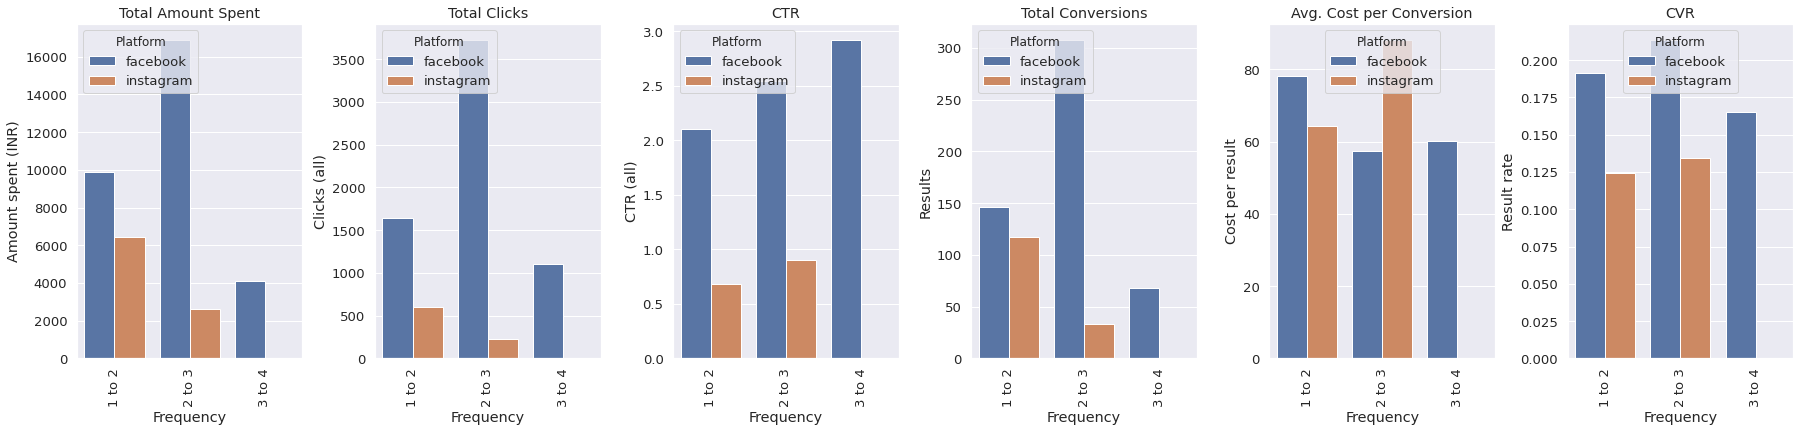

In [0]:
# increase figure size 
plt.figure(figsize=(25, 6))

# subplot 1
plt.subplot(1, 6, 1)
sns.barplot(hue='Platform', y='Amount spent (INR)', data=data, x='Frequency', estimator=np.sum,ci=None)
plt.title("Total Amount Spent")
plt.xticks(rotation=90)


# subplot 2
plt.subplot(1, 6, 2)
sns.barplot(hue='Platform', y='Clicks (all)', data=data, x='Frequency', estimator=np.sum,ci=None)
plt.title("Total Clicks")
plt.xticks(rotation=90)

# subplot 3
plt.subplot(1, 6, 3)
sns.barplot(hue='Platform', y='CTR (all)', data=data, x='Frequency', estimator=np.mean,ci=None)
plt.title("CTR")
plt.xticks(rotation=90)

# subplot 4
plt.subplot(1, 6, 4)
sns.barplot(hue='Platform', y='Results', data=data, x='Frequency', estimator=np.sum,ci=None)
plt.title("Total Conversions")
plt.xticks(rotation=90)

# subplot 5
plt.subplot(1, 6, 5)

sns.barplot(hue='Platform', y='Cost per result', data=data, x='Frequency', estimator=np.mean,ci=None)
plt.title("Avg. Cost per Conversion")
plt.xticks(rotation=90)

# subplot 6
plt.subplot(1,6, 6)
sns.barplot(hue='Platform', y='Result rate', data=data, x='Frequency', estimator=np.mean,ci=None)
plt.title("CVR")
plt.xticks(rotation=90)


plt.tight_layout(pad=0.7)
plt.show()